In [ ]:
# -*- coding: utf-8 -*-
"""读取文件，统计数据"""
import matplotlib.pyplot as plt 
import matplotlib as mpl
import json
from math import log
def isJson(jsonstr):
    """判断是否是json"""
    try:
        a = json.loads(jsonstr)
        return True
    except:
        return False

with open("all_result_break.json",'r',encoding="utf8") as load_f:
    keshi = {} #科室字典
    jibing = {} #疾病字典
    juzichangdu = {} #句子长度字典
    while True:
        #准备工作
        line = load_f.readline()
        if not line:
            break
        if not isJson(line):
            continue;
        json_to_dic = json.loads(line)
        
        #统计科室
        if "subject_name" not in json_to_dic:
            continue
        if json_to_dic["subject_name"] in keshi:
            keshi[json_to_dic["subject_name"]] += 1
        else:
             keshi[json_to_dic["subject_name"]] = 1
        
        #统计疾病
        if "diag" not in json_to_dic:
            continue
        for index,item in enumerate(json_to_dic["diag"]):
            if json_to_dic["diag"][index]["DIAG_DESC"] in jibing:
                jibing[json_to_dic["diag"][index]["DIAG_DESC"]] += 1
            else:
                jibing[json_to_dic["diag"][index]["DIAG_DESC"]] = 1
        pass # do something
    
        #句子长度，只统计呼吸相关科室的现病史
        if "呼吸" not in json_to_dic["subject_name"]:
            continue
        if "xianbingshi" not in json_to_dic:
            continue
        if len(json_to_dic["xianbingshi"]) in juzichangdu:
            juzichangdu[len(json_to_dic["xianbingshi"])] += 1
        else:
            juzichangdu[len(json_to_dic["xianbingshi"])] = 1
    
#     print(sorted(keshi.items(),key = lambda x:x[1],reverse = True))
#     print("-"*50)
#     print(sorted(jibing.items(),key = lambda x:x[1],reverse = True))
#     print("-"*50)
#     print(sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True))
    load_f.close()

In [98]:
"""打印总数与每一项"""
# 打印总数
keshi_count = 0
jibing_count = 0
juzichangdu_count = 0
for key in keshi:
    keshi_count += keshi[key]
for key in jibing:
    jibing_count += jibing[key]
for key in juzichangdu:
    juzichangdu_count += juzichangdu[key]
print("sample_num_of_keshi",":",keshi_count)
print("sample_num_of_jibing",":",jibing_count)
print("sample_num_of_juzichangdu",":",juzichangdu_count)

#逐项打印
for key,value in sorted(keshi.items(),key = lambda x:x[1],reverse = True):
    print(key,":",log(value ))
#     print(key,":",(value/keshi_count)*100,"%" )
print("--"*50)
for key,value in sorted(jibing.items(),key = lambda x:x[1],reverse = True):
    print(key,":",log(value ))
#     print(key,":",(value/jibing_count)*100,"%" )
print("--"*50)
for key,value in sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True):
    print(key,":",log(value ))
#     print(key,":",(value/juzichangdu_count)*100,"%" )

sample_num_of_keshi : 409186
sample_num_of_jibing : 1186637
sample_num_of_juzichangdu : 22498
产科1组(本部主7F东北) : 9.2621735206162
消化道肿瘤诊疗科1组(本部南2F) : 9.256842205627603
消化道肿瘤诊疗科3组(西区) : 9.045347797304004
乳腺肿瘤内科2组(南区14F西) : 8.860641041773876
妇科肿瘤科1组(本部主7F东南) : 8.768107539675803
综合肿瘤化疗科5组(西区) : 8.760453046315272
综合心血管内科一1组(本部保7F) : 8.690474003558043
综合儿科1组(本部主8F西南) : 8.672314828283538
儿童呼吸科1组(本部主8F东南) : 8.566173813637858
综合肿瘤化疗科6组(西区) : 8.52595469708481
普通妇科1组(本部主7F西南) : 8.523970175695261
眼科(南区) : 8.498418036089904
眼科 : 8.474494436883122
儿外科1组(本部主8F东北) : 8.471986598578159
儿童危重症科1组(本部主8F西北) : 8.424858580213442
肿瘤营养与代谢治疗科(西区) : 8.411165786770708
冠心病介入治疗科1组(南区8F东) : 8.389359819906353
甲状腺乳腺外科1组(南区7F东) : 8.313852267398207
综合神经内科1组(本部主16F) : 8.31238059678675
呼吸内科1组(本部南3F) : 8.31115254800169
心律失常科1组(南区8F西) : 8.296297112642508
关节外科1组(本部主15F) : 8.29054350077274
综合心血管内科CCU1组(南区主1F) : 8.243282523048375
消化内镜诊疗科1组(本部主9F东北) : 8.229511118964457
鼻及颅底外科1组(本部主12F) : 8.21959545417708
耳科1组(本部主13F) : 8.2128395846

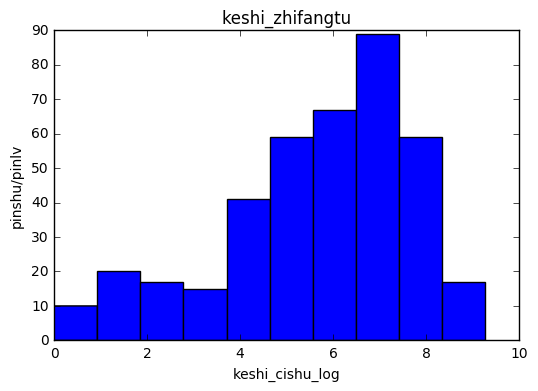

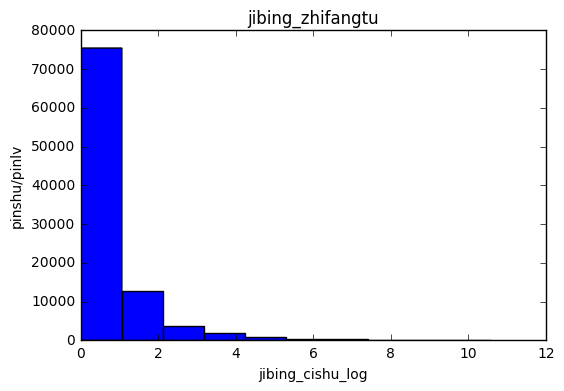

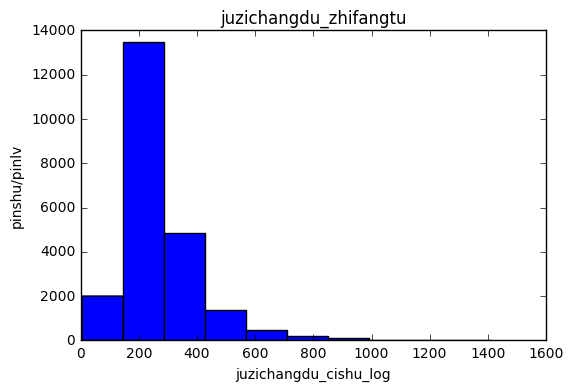

In [105]:
"""#画图  直方图"""
#keshi直方图
keshi_jishu_log = [log(value) for key,value in sorted(keshi.items(),key = lambda x:x[1],reverse = True) ]
plt.hist(keshi_jishu_log, 10, normed=False)   
plt.xlabel("keshi_cishu_log")
plt.ylabel("pinshu/pinlv")
plt.title("keshi_zhifangtu")
plt.show()

#jibing直方图
jibing_jishu_log = [log(value) for key,value in sorted(jibing.items(),key = lambda x:x[1],reverse = True)]
plt.hist(jibing_jishu_log,10,normed=False)
plt.xlabel("jibing_cishu_log")
plt.ylabel("pinshu/pinlv")
plt.title("jibing_zhifangtu")
plt.show()

#juzichangdu直方图
# juzichangdu_jishu_log = [log(value) for key,value in sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True)]
juzichangdu_jishu_log = []
for key,value in sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True):
    for i in range(value):
        juzichangdu_jishu_log.append(key)
# print(juzichangdu_jishu_log)
plt.hist(juzichangdu_jishu_log,10,normed=False)
plt.xlabel("juzichangdu_cishu_log")
plt.ylabel("pinshu/pinlv")
plt.title("juzichangdu_zhifangtu")
plt.show()


In [107]:
"""计算平均句子长度，平均科室出现次数，平均疾病出现次数"""
# 计算总数
keshi_count = 0 #科室出现总数
jibing_count = 0 #疾病出现总数
juzichangdu_count = 0 #句子长度出现总数，句子个数
for key in keshi:
    keshi_count += keshi[key]
for key in jibing:
    jibing_count += jibing[key]
for key in juzichangdu:
    juzichangdu_count += juzichangdu[key]
    
#计算每一项的平均值
#keshi 计算平均每个科室出现的次数 = 科室出现总数/科室个数
mean_keshi_chuxiancishu = keshi_count/len(keshi)
#jibing 计算平均每个疾病出现次数 = 疾病出现总次数/疾病种类
mean_jibing_chuxian_cishu = jibing_count/len(jibing)
#juzichangdu 计算平均句子长度 = (定长句子出现个数/句子个数)*(长度) 再对每个长度求和
mean_juzichangdu = 0
for key in juzichangdu:
    mean_juzichangdu += (key/juzichangdu_count)*(juzichangdu[key])
print("平均每个科室出现次数",":",mean_keshi_chuxiancishu)
print("平均每个疾病出现次数",":",mean_jibing_chuxian_cishu)
print("平均句子长度",":",mean_juzichangdu)


平均每个科室出现次数 : 1038.5431472081218
平均每个疾病出现次数 : 12.405124559624491
平均句子长度 : 268.17734909769734


In [1]:
import json

def isJson(jsonstr):
    """判断是否是json"""
    try:
        a = json.loads(jsonstr)
        return True
    except:
        return False

with open("all_result_break.json",'r',encoding="utf8") as load_f:
    count = 0
    for i in range(22):
        line = load_f.readline()
        if not line:
            break
        if not isJson(line):
            continue
        json_to_dic = json.loads(line)
        print(json_to_dic["xianbingshi"])
        print("-"*100)
        count += 1
    print(count)
    load_f.close()


患者余前无明显诱因下出现头痛不适，在当地医院就诊诊断为“慢性肾功能衰竭”，一直行血液透析治疗。近三个月来患者多次复查血肌酐明显升高，并进行性加重，透析治疗效果不佳。今患者为求进一步诊治而来我院就诊，我科门诊拟"慢性肾功能衰竭，尿毒症期"收治入院。病程中患者饮食睡眠一般，尿量逐渐减少，现已无尿，偶有排便习性异常，近期体重无明显变化。
----------------------------------------------------------------------------------------------------
患者于2天前无明显诱因下出现左侧眼睑下垂，无明显头痛头晕及意识障碍，无明显晨轻暮重，无明显斜视、复视，无咀嚼无力及饮水呛咳、吞咽困难，无明显颈软、抬头困难及耸肩无力，无明显呼吸困难，无畏寒发热，至神经内科及眼科门诊就诊，考虑脑梗塞可能，今日入院求进一步诊治，患者病程中饮食睡眠可，二便正常。
----------------------------------------------------------------------------------------------------
7年前因“手麻”外院行相关检查，发现空腹血糖14+每升，餐后血糖17毫摩尔每升，否认口干、多饮、多尿等症状，诊断为“2型糖尿病”，予以口服药物治疗，1年前因血糖控制不佳，开始联合胰岛素治疗，现“胰岛素20单位晚十点皮下注射”，联合“二甲双胍（0.25克每片），每天2次，每次3片”，“阿卡波糖（50毫克每片）每天3次，每次1片”，近1月监测血糖控制不佳，6天前外院复查空腹血糖14.38毫摩尔每升，餐后血糖19.75毫摩尔每升，现为求进一步全面诊治，门诊拟“2型糖尿病”收住我科。病程中，否认发热、咳嗽、咳痰，否认胸闷气喘，否认双眼视物模糊，否认四肢麻木，否认间歇性跛行，否认腹泻便秘交替，否认双下肢浮肿，否认尿频、尿急、尿痛，饮食、睡眠正常，大小便正常，近期体重无明显变化。
----------------------------------------------------------------------------------------------------
八年前反复出现胸闷气促，多发作于活动或睡眠时，伴腹胀纳差、夜间阵发性呼吸困难、活动耐量下降

In [ ]:
"""-----------------------------------分割线---------------------------------------"""